In [ ]:
TASK 5

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dtype_dict = {23: str, 24: str, 70: str, 71: str}
accident_data = pd.read_csv(r'C:\Users\bharath\Downloads\archive (2)\veh_16.csv', dtype=dtype_dict,low_memory=False)

In [21]:
accident_data

,CASENUM,VEH_NO,PSU,PJ,STRATUM,VE_FORMS,NUMOCCS,MONTH,HOUR,MINUTE,...,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,URBANICITY,REGION,PSUSTRAT,PSU_VAR,WEIGHT
0,201600014311,1,44,388,9,2,1,1,12,33,...,12,15,0,0,2,2,4,25,44,219.795475
1,201600014311,2,44,388,9,2,1,1,12,33,...,12,1,0,0,2,2,4,25,44,219.795475
2,201600014315,1,44,388,8,2,1,1,19,32,...,12,11,1,1,2,2,4,25,44,186.634758
3,201600014315,2,44,388,8,2,3,1,19,32,...,12,1,1,3,2,2,4,25,44,186.634758
4,201600014316,1,44,388,5,1,1,1,6,20,...,1,1,3,1,2,2,4,25,44,32.222550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82144,201600991811,1,41,163,10,2,1,12,18,55,...,12,1,0,0,2,1,4,22,41,357.694967
82145,201600991811,2,41,163,10,2,2,12,18,55,...,12,2,0,0,2,1,4,22,41,357.694967
82146,201600991821,1,41,160,8,1,1,1,10,10,...,1,14,3,1,2,1,4,22,41,234.268106
82147,201600991832,1,41,160,6,2,2,1,11,32,...,12,2,0,0,2,1,4,22,41,98.551521


Accidents by Road Condition:
            CASENUM  Count
0      201600014311      2
1      201600014315      2
2      201600014316      1
3      201600014335      2
4      201600014586      1
...             ...    ...
46506  201600991753      2
46507  201600991782      3
46508  201600991811      2
46509  201600991821      1
46510  201600991832      2

[46511 rows x 2 columns]


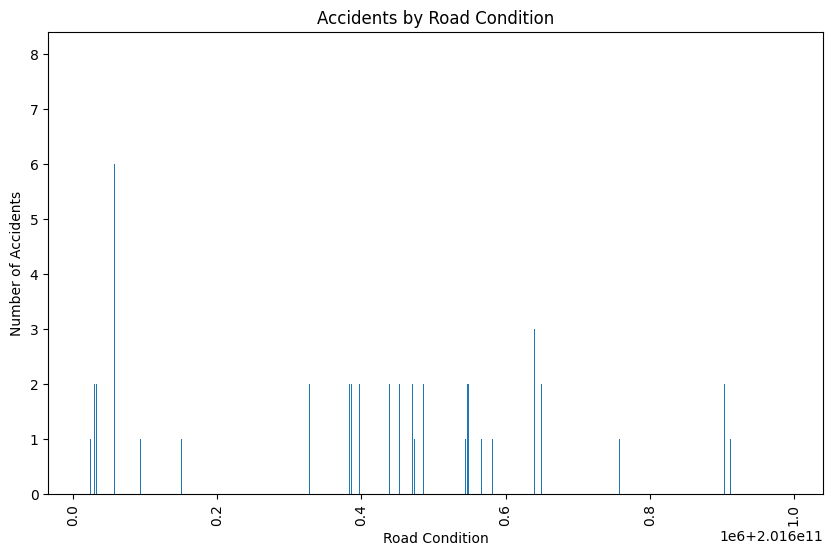

In [27]:
road_conditions = accident_data.groupby('CASENUM').size().reset_index(name='Count')


print('Accidents by Road Condition:')
print(road_conditions)


plt.figure(figsize=(10, 6))
plt.bar(road_conditions['CASENUM'], road_conditions['Count'])
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Condition')
plt.xticks(rotation=90)
plt.show()


Accidents by Weather Condition:
   REGION  Count
0       1   6800
1       2  17188
2       3  46566
3       4  11595


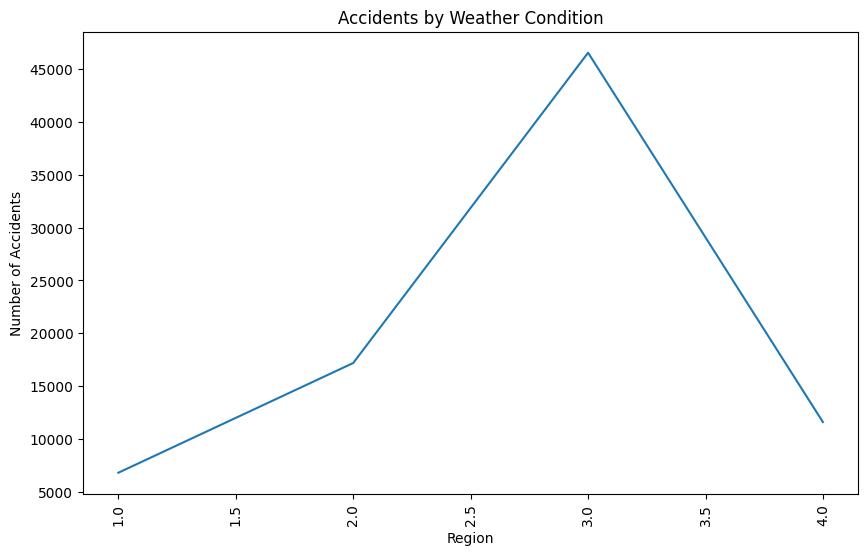

In [28]:
weather_conditions = accident_data.groupby('REGION').size().reset_index(name='Count')

print('\nAccidents by Weather Condition:')
print(weather_conditions)

plt.figure(figsize=(10, 6))
plt.plot(weather_conditions['REGION'], weather_conditions['Count'])
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=90)
plt.show()


Accidents by Time of Day:
  Time_of_Day  Count
0       Night  10574
1     Morning  29921
2   Afternoon  27748
3     Evening  11939


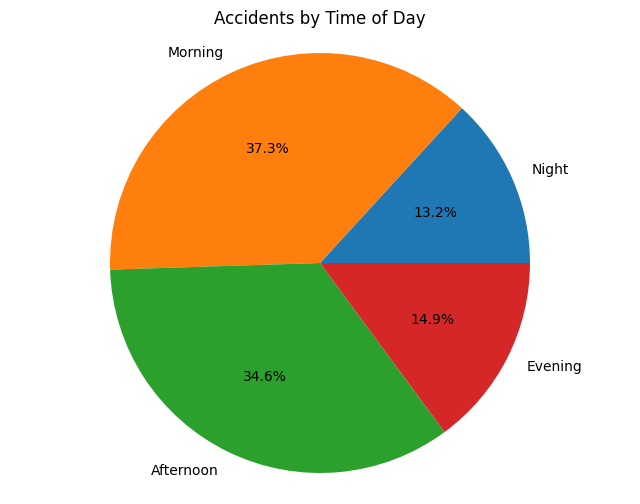

In [29]:
accident_data['Time_of_Day'] = pd.cut(accident_data['PSUSTRAT'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
time_of_day = accident_data.groupby('Time_of_Day', observed=False).size().reset_index(name='Count')
print('\nAccidents by Time of Day:')
print(time_of_day)

plt.figure(figsize=(8, 6))
plt.pie(time_of_day['Count'], labels=time_of_day['Time_of_Day'], autopct='%1.1f%%')
plt.title('Accidents by Time of Day')
plt.axis('equal')  
plt.show()

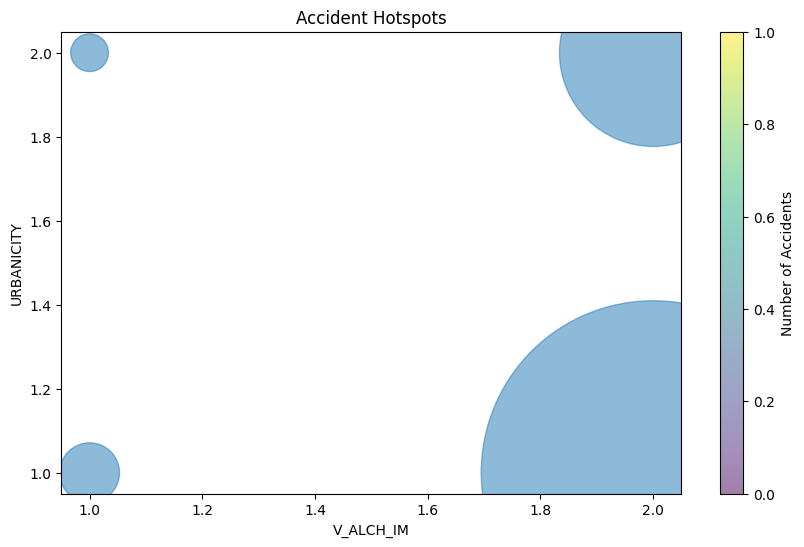

In [30]:
accident_locations = accident_data.groupby(['URBANICITY', 'V_ALCH_IM']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6)) 
plt.scatter(accident_locations['V_ALCH_IM'], accident_locations['URBANICITY'], s=accident_locations['Count'], alpha=0.5)
plt.xlabel('V_ALCH_IM')
plt.ylabel('URBANICITY')
plt.title('Accident Hotspots')
cbar = plt.colorbar()
cbar.set_label('Number of Accidents')
plt.show()